In [ ]:
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV data
data_path = "Blip_FineTuning.csv"
data1 = pd.read_csv(data_path)

In [ ]:
data = data1.head(50)

In [ ]:
data

,frame_path,description
0,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
1,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
2,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
3,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
4,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
5,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
6,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
7,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
8,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.
9,/content/drive/MyDrive/New(1)Blip/4370f4e5-580...,Jump Ball Ayton vs. Jordan: Tip to Smith Jr.


In [ ]:
class CustomImageCaptioningDataset(Dataset):
    def __init__(self, dataframe, processor):
        self.dataframe = dataframe
        self.processor = processor

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_path = row['frame_path']
        description = row['description']

        retry_count = 0
        max_retries = 5  # Maximum number of retries for loading an image

        while retry_count < max_retries:
            try:
                image = Image.open(image_path).convert("RGB")
                encoding = self.processor(images=image, text=description, padding="max_length", return_tensors="pt")
                encoding = {k: v.squeeze() for k, v in encoding.items()}
                return encoding
            except UnidentifiedImageError:
                print(f"Error: Cannot identify image file {image_path}. Retrying ({retry_count + 1}/{max_retries})...")
                retry_count += 1

        # If the image cannot be loaded after max_retries, raise an error or handle it accordingly
        raise ValueError(f"Error: Cannot identify image file {image_path} after {max_retries} retries.")

In [ ]:
# Initialize the processor and model
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
# Create the custom dataset and dataloader
custom_dataset = CustomImageCaptioningDataset(data, processor)
train_dataloader = DataLoader(custom_dataset, shuffle=True, batch_size=2)

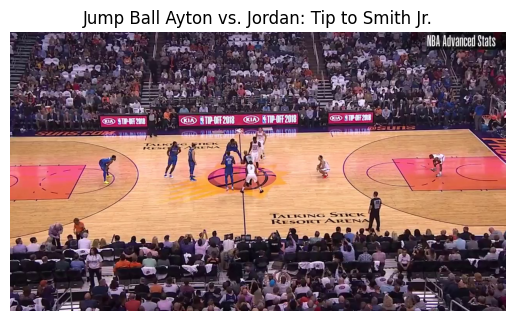

In [ ]:
def display_sample_image(dataframe):
    row = dataframe.iloc[0]
    image_path = row['frame_path']
    description = row['description']

    try:
        image = Image.open(image_path).convert("RGB")
        plt.imshow(image)
        plt.title(description)
        plt.axis('off')
        plt.show()
    except UnidentifiedImageError:
        print(f"Error: Cannot identify image file {image_path}.")

# Display a sample image
display_sample_image(data)

In [ ]:
# Set up the training loop
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
model.train()

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [ ]:
num_epochs = 5  # Reduced number of epochs
print_interval = 10  # Print loss every 10 batches

for epoch in range(num_epochs):
    print(f"Epoch: {epoch}")
    epoch_loss = 0
    for idx, batch in enumerate(train_dataloader):
        if 'input_ids' not in batch or 'pixel_values' not in batch:
            continue  # Skip batch if it doesn't have required keys
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=input_ids)
        loss = outputs.loss

        epoch_loss += loss.item()
        if idx % print_interval == 0:
            print(f"Batch {idx} - Loss: {loss.item()}")

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_epoch_loss = epoch_loss / len(train_dataloader)
    print(f"Epoch {epoch} completed with average loss: {avg_epoch_loss}")

Epoch: 0


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Batch 0 - Loss: 13.142508506774902
Batch 10 - Loss: 10.094087600708008
Batch 20 - Loss: 7.357843399047852
Epoch 0 completed with average loss: 9.118619403839112
Epoch: 1
Batch 0 - Loss: 6.628084659576416
Batch 10 - Loss: 5.275985240936279
Batch 20 - Loss: 3.7952466011047363
Epoch 1 completed with average loss: 4.945518569946289
Epoch: 2
Batch 0 - Loss: 3.106019973754883
Batch 10 - Loss: 1.7651067972183228
Batch 20 - Loss: 0.8371647000312805
Epoch 2 completed with average loss: 1.660638871192932
Epoch: 3
Batch 0 - Loss: 0.5399389863014221
Batch 10 - Loss: 0.3049655556678772
Batch 20 - Loss: 0.18412111699581146
Epoch 3 completed with average loss: 0.2779909324645996
Epoch: 4
Batch 0 - Loss: 0.1328088790178299
Batch 10 - Loss: 0.08303431421518326
Batch 20 - Loss: 0.10099334269762039
Epoch 4 completed with average loss: 0.10887017995119094


In [ ]:
# Save the fine-tuned model and processor to Google Drive
save_directory = "/content/drive/MyDrive/FineTunedModel"
model.save_pretrained(save_directory)
processor.save_pretrained(save_directory)

[]

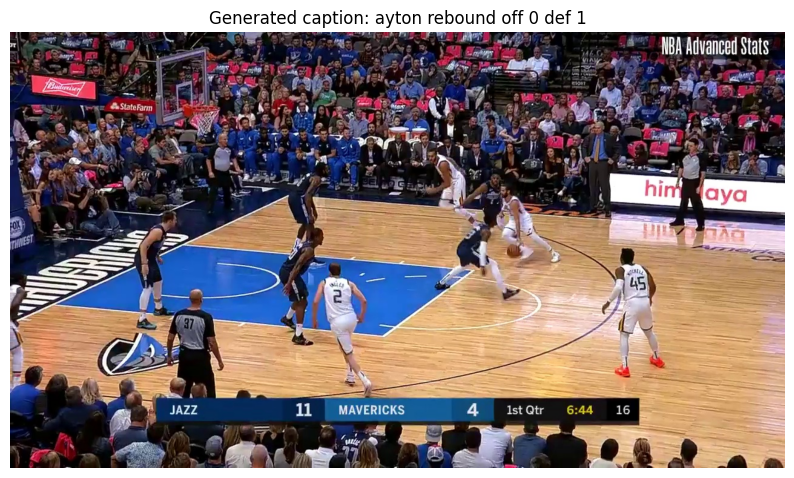

In [15]:
import torch
from transformers import BlipForConditionalGeneration, AutoProcessor
from PIL import Image
import matplotlib.pyplot as plt

# Specify the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the fine-tuned model and processor from Google Drive
save_directory = "/content/drive/MyDrive/FineTunedModel"
model = BlipForConditionalGeneration.from_pretrained(save_directory).to(device)
processor = AutoProcessor.from_pretrained(save_directory)

# Load and preprocess the sample image
sample_image_path = "sample.jpg"
image = Image.open(sample_image_path).convert("RGB")

# Prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

# Generate a caption for the sample image
generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Display the sample image with the generated caption
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title(f"Generated caption: {generated_caption}")
plt.show()